In [2]:
42 + 13

55

In [4]:
import numpy as np

In [6]:
#!/usr/bin/env python3
'''THE BEST VERSION SO FAR!!!'''
#from operator import add
from enum import Enum
from collections import namedtuple
# You are not supposed to understand this
# yet
class Move(namedtuple('Move', ['dx', 'dy']), Enum):
    '''Shut up pylint'''
    UP    = ( 0 , -1 )
    DOWN  = ( 0 ,  1 )
    RIGHT = ( 1 ,  0 )
    LEFT  = (-1 ,  0 )

class Coord(namedtuple('Coord', ['x','y'])):
    '''Shut up pylint'''
    def __add__(self,depl):
        '''it's addition, stupid'''
        #return Coord( *(add(*t) for t in zip( self, depl.value )))
        return Coord( self.x + depl.dx, self.y + depl.dy)

print(Coord(3,4) + Move.UP)
print( (Coord(3,4) + Move.DOWN).x,
       (Coord(3,4) + Move.DOWN).y,
       Move.UP.dy)

Coord(x=3, y=3)
3 5 -1


In [7]:
dataurl = 'http://opendata.cern.ch/record/700/files/MuRun2010B.csv'

In [8]:
import requests
with requests.get(dataurl) as r:
    if r.ok:
        rawdata = r.content

In [10]:
len(rawdata)

15164517

In [11]:
rawdata[:100]

b'Run,Event,Type1,E1,px1 ,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M\n146436,9083'

In [13]:
data = np.genfromtxt(dataurl, delimiter=',', skip_header=1)

In [14]:
len(data)

100000

In [15]:
data[0]

array([ 1.4643600e+05,  9.0830792e+07,            nan,  1.9171200e+01,
        3.8171300e+00,  9.0432300e+00, -1.6467300e+01,  9.8158300e+00,
       -1.2894200e+00,  1.1713900e+00,  1.0000000e+00,            nan,
        5.4398400e+00, -3.6259200e-01,  2.6269900e+00, -4.7484900e+00,
        2.6518900e+00, -1.3458700e+00,  1.7079600e+00,  1.0000000e+00,
        2.7320500e+00])

In [16]:
type(data[0][1])

numpy.float64

In [17]:
len(data[1])

21

In [22]:
import pandas as pd
print(dataurl)
data = pd.read_csv(dataurl)

http://opendata.cern.ch/record/700/files/MuRun2010B.csv


In [20]:
data

Run      Event Type1        E1      px1        py1       pz1  \
0      146436   90830792     G  19.17120  3.817130  9.043230 -16.46730   
1      146436   90862225     G  12.94350  5.125790 -3.983690 -11.19730   
2      146436   90644850     G  12.39990 -0.849742  9.401100   8.04015   
3      146436   90678594     G  17.81320 -1.959590  2.805310  17.48110   
4      146436   90686690     G   7.95664  7.097000 -1.316460   3.34613   
...       ...        ...   ...       ...       ...       ...       ...   
99995  147926  111123465     G   7.12024  0.753900  2.921130   6.44866   
99996  147926  111160849     G  14.26330  6.672270 -9.719310   8.02777   
99997  147926  111198433     G  15.46470  5.638970 -1.198720  14.34950   
99998  147926  111267041     G  10.34210  6.399880 -0.074015  -8.12301   
99999  147926  111310609     G  13.01730 -2.535090 -2.831540  12.44970   

            pt1      eta1      phi1  ...  Type2        E2       px2       py2  \
0       9.81583 -1.289420  1.171390  ...      T   5.43984 -0.362592  2.626990   
1       6.49180 -1.313350 -0.660674  ...      G  11.86360  4.789840 -6.262220   
2       9.43943  0.772580  1.660940  ...      G   8.55532 -4.851550  6.976960   
3       3.42195  2.333500  2.180530  ...      G   9.42174  4.365230  0.168017   
4       7.21806  0.448399 -0.183411  ...      T   5.44467 -1.341760  1.386470   
...         ...       ...       ...  ...    ...       ...       ...       ...   
99995   3.01684  1.503510  1.318220  ...      G   5.48304  4.495030  3.044660   
99996  11.78920  0.636987 -0.969191  ...      G   4.29130 -2.874230 -3.081560   
99997   5.76497  1.643170 -0.209461  ...      G  11.39340  6.334400  5.276440   
99998   6.40030 -1.059510 -0.011565  ...      G   8.27498 -6.136300  1.893890   
99999   3.80056  1.902220 -2.301010  ...      T   6.31165  0.629169 -1.933500   

            pz2      pt2      eta2      phi2  Q2         M  
0     -4.748490  2.65189 -1.345870  1.707960   1   2.73205  
1     -8.864340  7.88403 -0.966622 -0.917841   1   3.10256  
2     -0.983229  8.49797 -0.115445  2.178410  -1   9.41149  
3      8.347130  4.36846  1.403000  0.038471   1   7.74702  
4      5.090250  1.92941  1.697380  2.339810  -1   8.67727  
...         ...      ...       ...       ...  ..       ...  
99995  0.759731  5.42912  0.139484  0.595355  -1   6.61359  
99996  0.804277  4.21393  0.189721 -2.321400  -1   9.37972  
99997 -7.863410  8.24412 -0.848340  0.694531   1  22.78810  
99998 -5.217580  6.42191 -0.742373  2.842230  -1  12.85460  
99999  5.974230  2.03330  1.798720 -1.256200   1   2.79810  

[100000 rows x 21 columns]

In [24]:
data.keys()

Index(['Run', 'Event', 'Type1', 'E1', 'px1 ', 'py1', 'pz1', 'pt1', 'eta1',
       'phi1', 'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2',
       'Q2', 'M'],
      dtype='object')

In [25]:
data['px1'] = data['px1 ']


In [26]:
del(data['px1 '])

In [27]:
data['vector sum px'] = data['px1'] + data['px2']

In [28]:
data.keys()

Index(['Run', 'Event', 'Type1', 'E1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1',
       'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M', 'px1', 'vector sum px'],
      dtype='object')

In [30]:
data['vector sum py'] = data['py1'] + data['py2']
data['vector sum pz'] = data['pz1'] + data['pz2']

In [31]:
data.keys()

Index(['Run', 'Event', 'Type1', 'E1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1',
       'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M', 'px1', 'vector sum px', 'vector sum py', 'vector sum pz'],
      dtype='object')

In [32]:
data['resultant momentum sum'] = (data['vector sum px']**2+data['vector sum py']**2+data['vector sum pz']**2)**(0.5)

In [33]:
data.keys()

Index(['Run', 'Event', 'Type1', 'E1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1',
       'Q1', 'Type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2',
       'M', 'px1', 'vector sum px', 'vector sum py', 'vector sum pz',
       'resultant momentum sum'],
      dtype='object')

In [34]:
data['invariant mass'] = ( (data['E1']+data['E2'])**2 - data['resultant momentum sum'] ** 2)**(0.5)

In [35]:
min(data['invariant mass']), max(data['invariant mass'])

(1.958119099640791, 109.97712963856803)

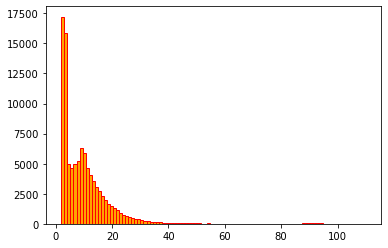

In [40]:
%matplotlib inline
from matplotlib import pyplot
pyplot.hist(data['invariant mass'],
            range = ( min(data['invariant mass']),
                      max(data['invariant mass'])),
            bins = 100, color = 'orange',
            edgecolor = 'red')
pyplot.show()